# EDA: LIFE EXPECTANCY BASED ON HOUSE HOLD INCOME

## Read file

In [308]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [309]:
path = "lifeexpectancy_test.csv"
df = pd.read_csv(path)

## Data exploration

In [310]:
df.head()

,Gender,Household income percentile,Age at death,Year of death,income lag,mortality rate,mean household income,count of deaths,count alive at beginning of year,Unnamed: 9
0,F,1.0,40.0,2001.0,2.0,0.0044,365,95.0,"21,545",NaN
1,F,1.0,40.0,2002.0,2.0,0.0058,384,124.0,"21,431",NaN
2,F,1.0,40.0,2003.0,2.0,0.0050,375,107.0,"21,203",NaN
3,F,1.0,40.0,2004.0,2.0,0.0048,371,100.0,"20,890",NaN
4,F,1.0,40.0,2005.0,2.0,0.0047,356,93.0,"19,684",NaN


In [311]:
#drop unused column
df.drop(['Unnamed: 9'], axis=1, inplace=True)

In [312]:
# Convert 'mean household income', 'count alive at beginning of year' to float, handling non-numeric characters
df['mean household income'] = df['mean household income'].str.replace(',', '').astype(float)
df['count alive at beginning of year'] = df['count alive at beginning of year'].str.replace(',', '').astype(float)

,Gender,Household income percentile,Age at death,Year of death,income lag,mortality rate,mean household income,count of deaths,count alive at beginning of year
0,F,1.0,40.0,2001.0,2.0,0.0044,365.0,95.0,21545.0
1,F,1.0,40.0,2002.0,2.0,0.0058,384.0,124.0,21431.0
2,F,1.0,40.0,2003.0,2.0,0.0050,375.0,107.0,21203.0
3,F,1.0,40.0,2004.0,2.0,0.0048,371.0,100.0,20890.0
4,F,1.0,40.0,2005.0,2.0,0.0047,356.0,93.0,19684.0
...,...,...,...,...,...,...,...,...,...
85395,M,100.0,74.0,2013.0,13.0,0.0143,2700885.0,123.0,8581.0
85396,M,100.0,74.0,2014.0,13.0,0.0147,2157079.0,131.0,8925.0
85397,M,100.0,75.0,2013.0,14.0,0.0156,2458902.0,130.0,8359.0
85398,M,100.0,75.0,2014.0,14.0,0.0161,2700885.0,136.0,8458.0


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85401 entries, 0 to 85400
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            85400 non-null  object 
 1   Household income percentile       85400 non-null  float64
 2   Age at death                      85400 non-null  float64
 3   Year of death                     85400 non-null  float64
 4   income lag                        85400 non-null  float64
 5   mortality rate                    85400 non-null  float64
 6   mean household income             85400 non-null  float64
 7   count of deaths                   85400 non-null  float64
 8   count alive at beginning of year  85400 non-null  float64
dtypes: float64(8), object(1)
memory usage: 5.9+ MB


In [284]:
df.describe()

,Household income percentile,Age at death,Year of death,income lag,mortality rate,mean household income,count of deaths,count alive at beginning of year
count,85400.000000,85400.000000,85400.000000,85400.000000,85400.000000,8.540000e+04,85400.000000,85400.000000
mean,50.500000,55.016393,2008.032787,3.065574,0.006074,9.799557e+04,80.233934,16490.482646
std,28.866239,9.246217,3.995788,2.514685,0.006415,2.168443e+05,61.392211,4109.884429
min,1.000000,40.000000,2001.000000,2.000000,0.000000,1.700000e+01,0.000000,5606.000000
25%,25.750000,47.000000,2005.000000,2.000000,0.001800,3.049600e+04,34.000000,12605.000000
50%,50.500000,55.000000,2008.000000,2.000000,0.003800,5.982400e+04,63.000000,17704.000000
75%,75.250000,62.000000,2012.000000,2.000000,0.008000,1.030680e+05,110.000000,19887.000000
max,100.000000,76.000000,2014.000000,15.000000,0.053800,1.405658e+07,532.000000,21762.000000


In [285]:
# Count of unique values for categorical variables
df.select_dtypes(include=['object']).nunique()

Gender    2
dtype: int64

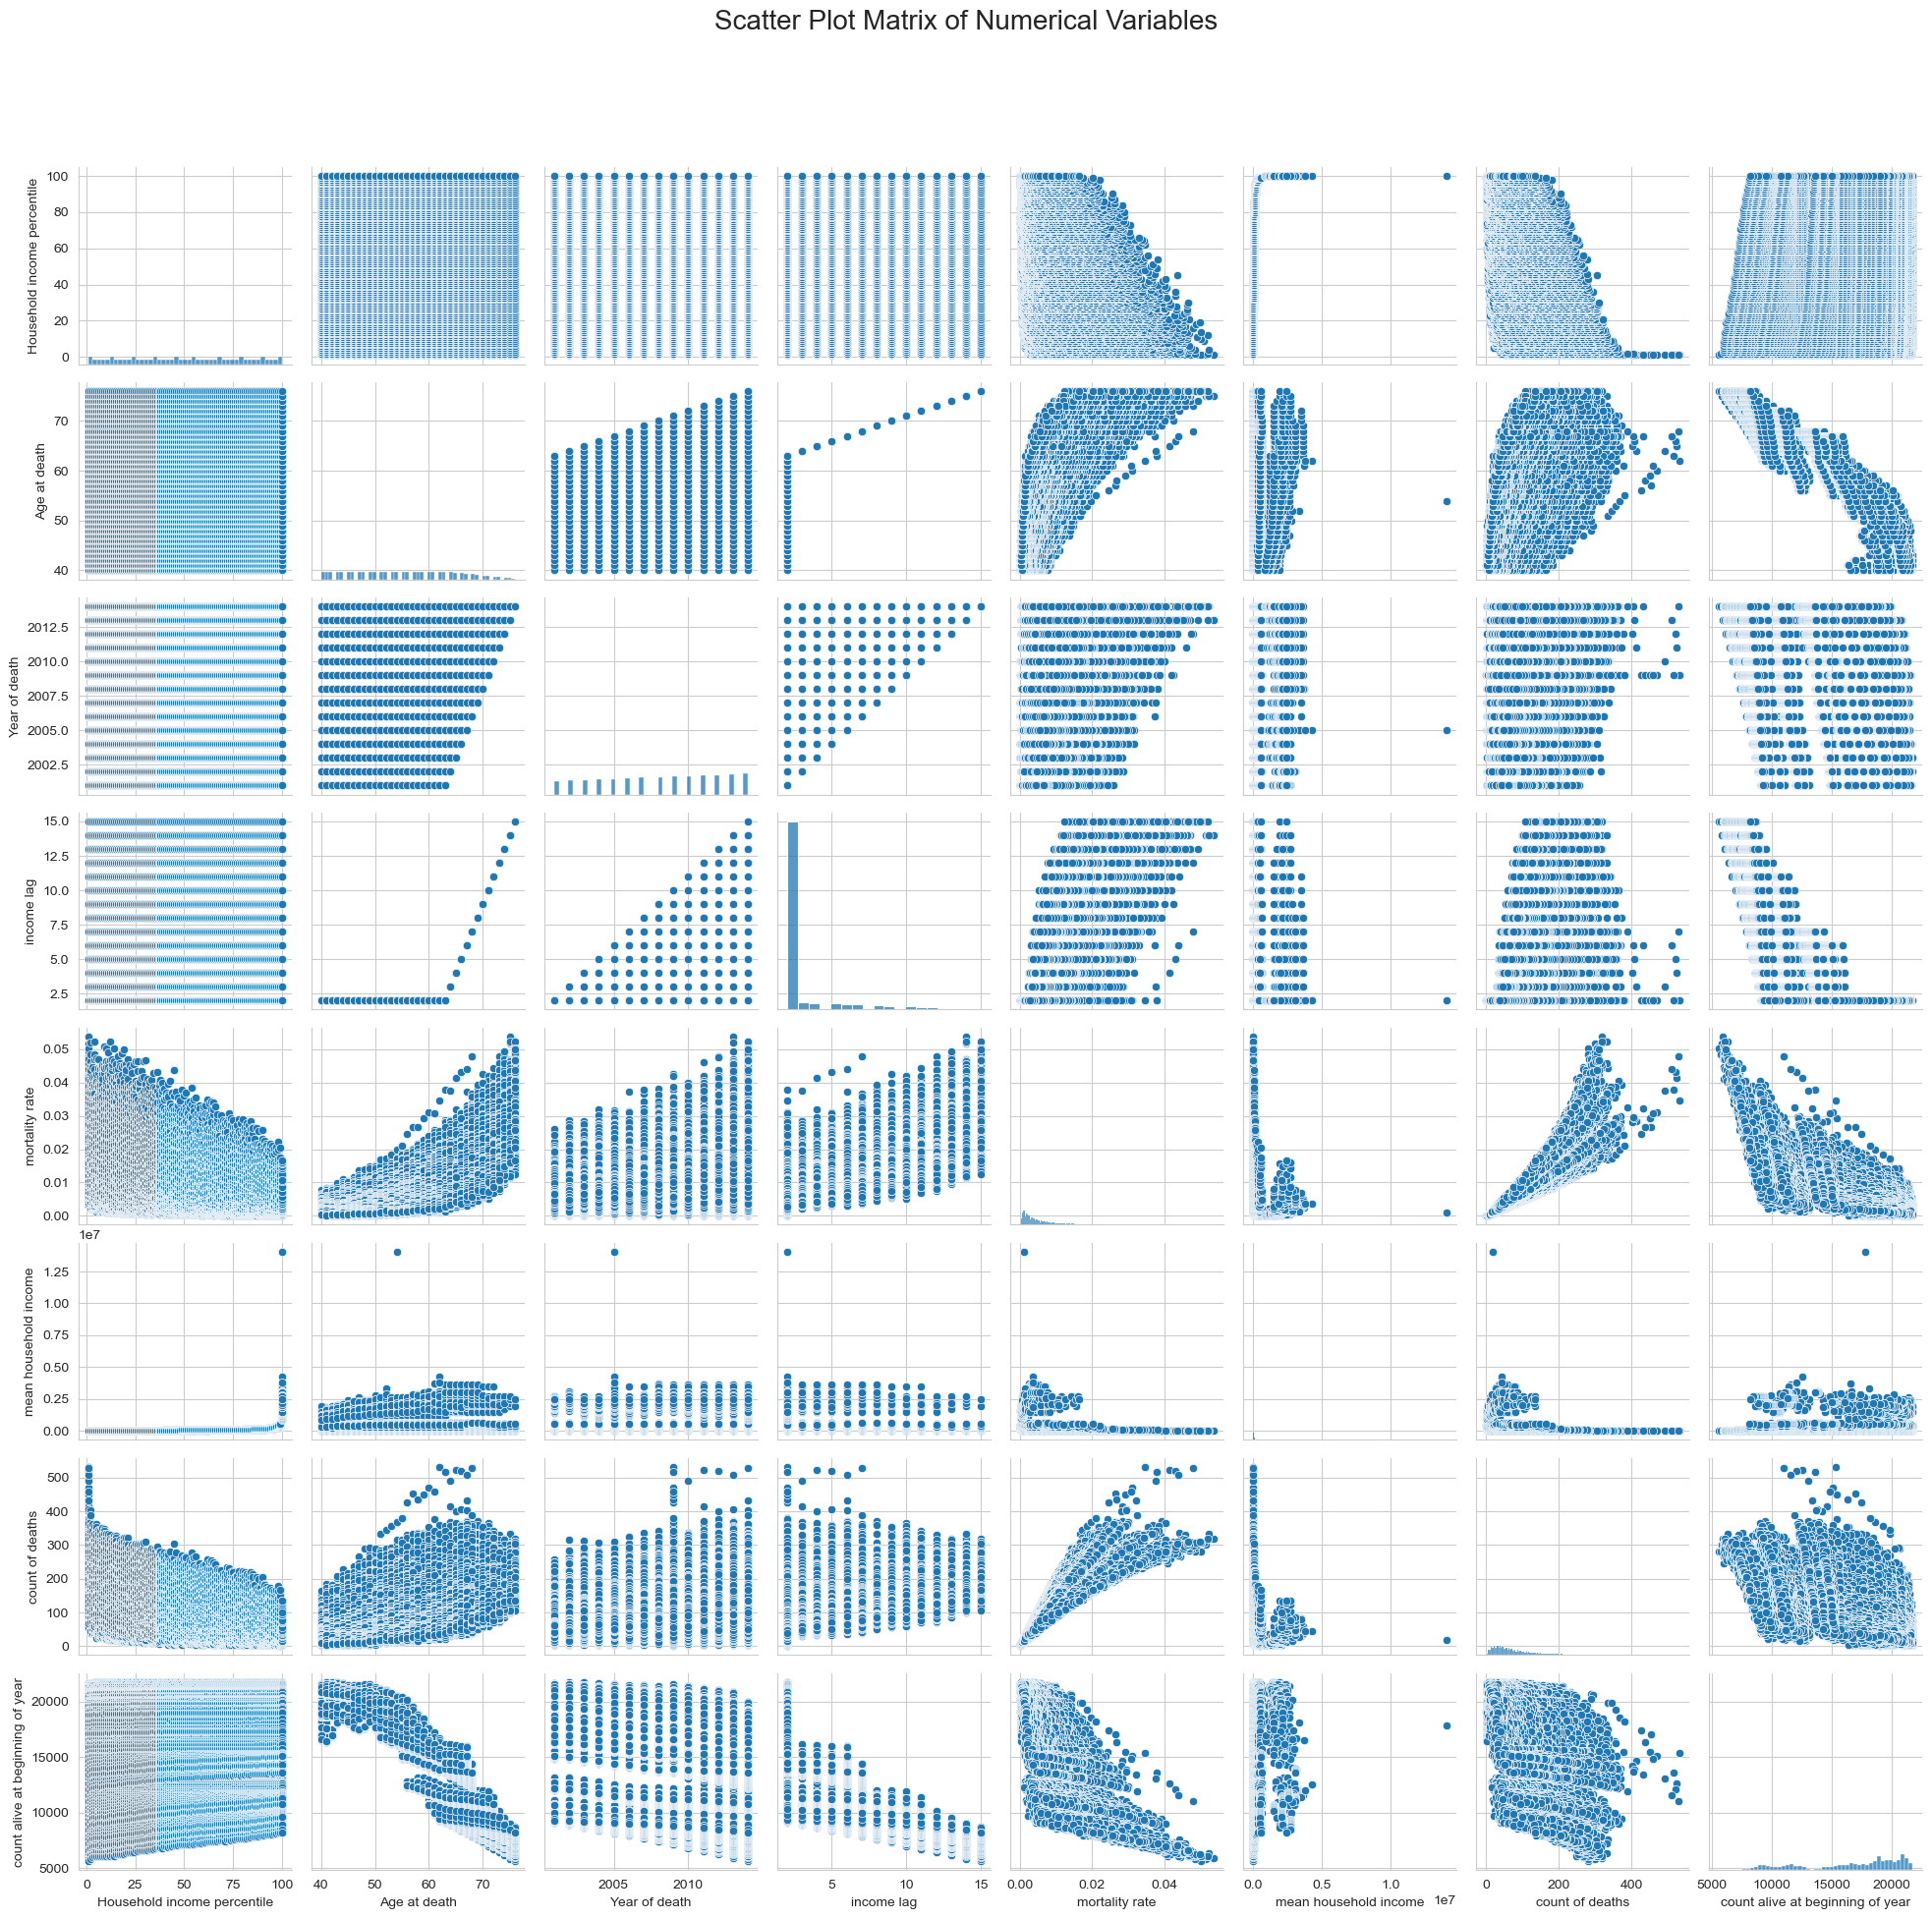

In [286]:
# Select only numerical columns for the pairplot
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a pairplot of the numerical variables
sns.pairplot(numerical_columns)

# Adjust the plot size
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatter Plot Matrix of Numerical Variables', fontsize=20)
plt.savefig('pairplot.png')
plt.show()

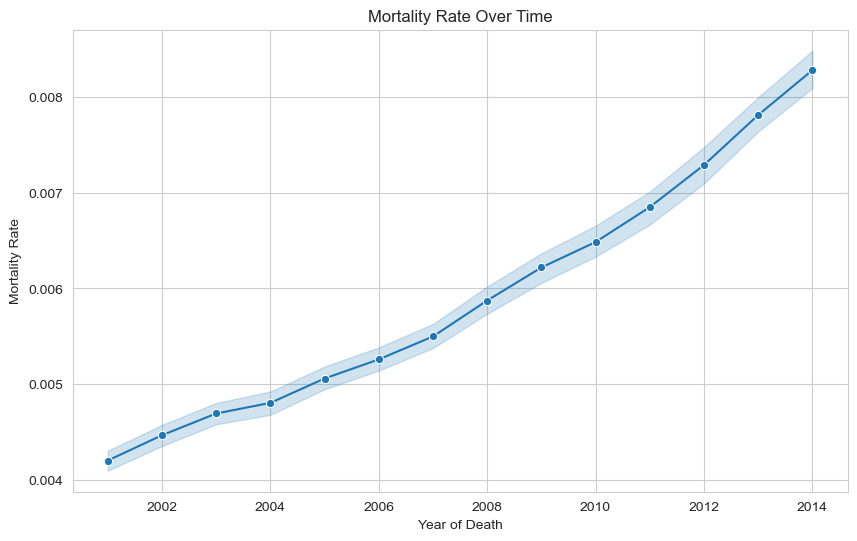

In [287]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year of death', y='mortality rate', data=df, marker='o')
plt.title('Mortality Rate Over Time')
plt.xlabel('Year of Death')
plt.ylabel('Mortality Rate')
plt.show()


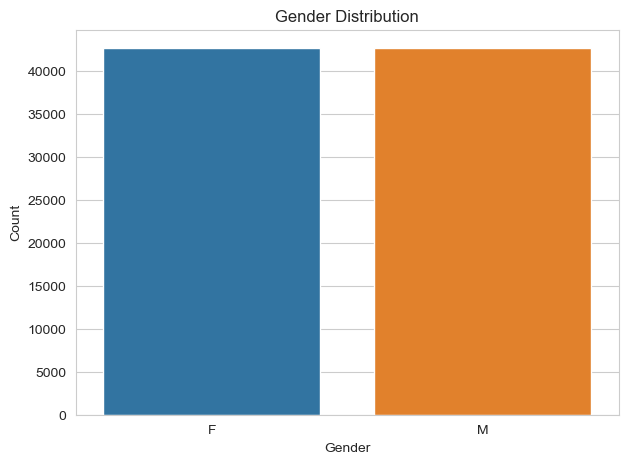

In [288]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


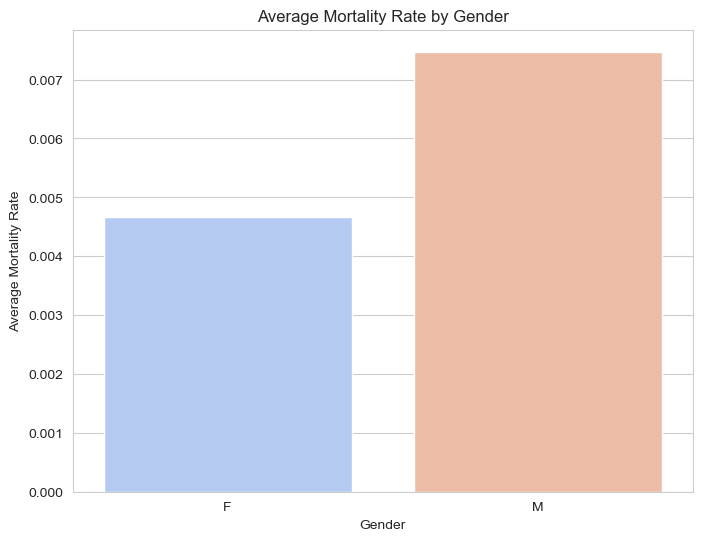

In [289]:
# Group the data by 'Gender' and calculate the average 'mortality rate' for each group
average_mortality_rate_by_gender = df.groupby('Gender')['mortality rate'].mean()

# Reset the index of the DataFrame to use both 'Gender' and 'mortality rate' as columns for plotting
average_mortality_rate_by_gender_reset = average_mortality_rate_by_gender.reset_index()

# Plot the bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='mortality rate', data=average_mortality_rate_by_gender_reset, palette='coolwarm')
plt.title('Average Mortality Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Mortality Rate')
plt.show()

In [290]:
# Replace 'M' and 'F' with 1 and 0, respectively
df['Gender'] = df['Gender'].replace({'M': 1, 'F': 0})
df['Gender'] = df['Gender'].astype('Int64')

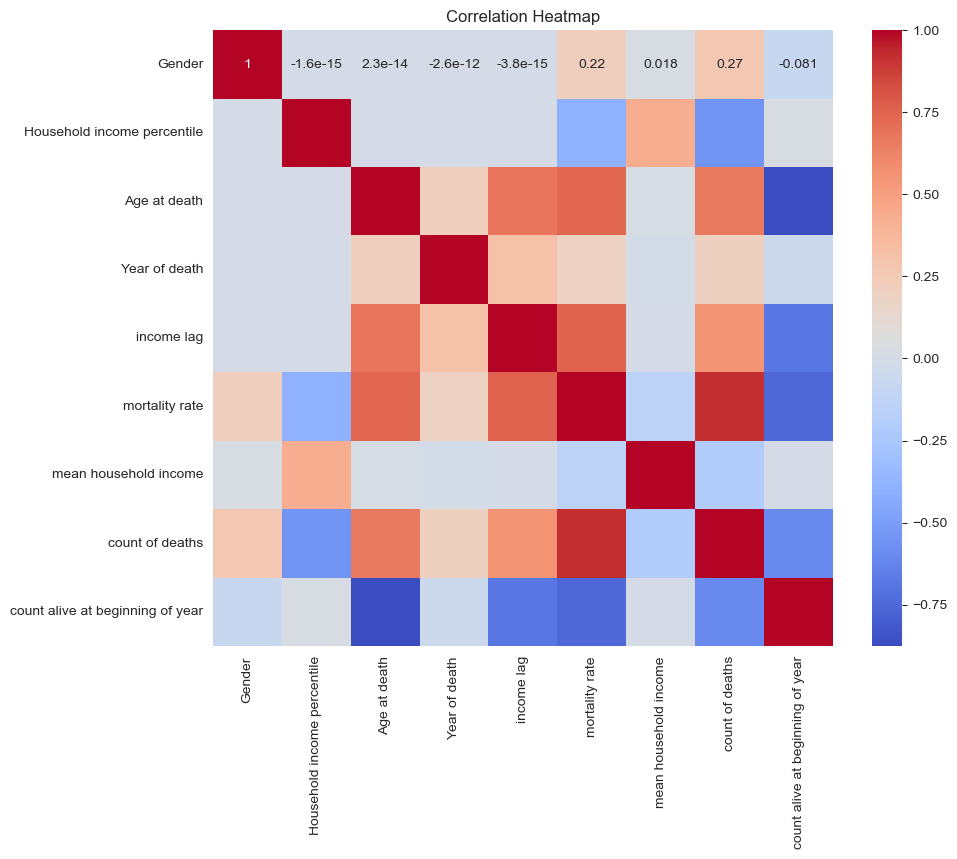

In [291]:
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix for numerical variables
corr =df.select_dtypes(include=['float64', 'int64']).corr()

# Create the heatmap, annot=True labels each cell with the 
#correlation coefficient
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('heatmap.png')
plt.show()

In [299]:
df_sampled = df.sample(n=10000, random_state=42)

# Display the first few rows to verify the sampling
print(df_sampled.head())

       Gender  Household income percentile  Age at death  Year of death  \
28260       0                         67.0          45.0         2009.0   
39595       0                         93.0          62.0         2004.0   
47090       1                         11.0          48.0         2009.0   
563         0                          2.0          49.0         2011.0   
3737        0                          9.0          62.0         2014.0   

       income lag  mortality rate  mean household income  count of deaths  \
28260         2.0          0.0009                88246.0             19.0   
39595         2.0          0.0026               164462.0             32.0   
47090         2.0          0.0051                13865.0            106.0   
563           2.0          0.0062                 1989.0            130.0   
3737          2.0          0.0085                10567.0            137.0   

       count alive at beginning of year  
28260                           21068.0  
39

In [293]:
df_sampled.describe()

,Gender,Household income percentile,Age at death,Year of death,income lag,mortality rate,mean household income,count of deaths,count alive at beginning of year
count,10000.0,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000
mean,0.5027,50.80550,55.166600,2008.02530,3.087600,0.006136,9.927424e+04,80.637900,16432.602600
std,0.500018,28.86879,9.240356,3.95725,2.535699,0.006457,2.151980e+05,61.571423,4142.723311
min,0.0,1.00000,40.000000,2001.00000,2.000000,0.000100,1.700000e+01,3.000000,6107.000000
25%,0.0,26.00000,47.000000,2005.00000,2.000000,0.001800,3.103875e+04,34.000000,12435.250000
50%,1.0,51.00000,55.000000,2008.00000,2.000000,0.003800,6.085700e+04,63.000000,17650.000000
75%,1.0,76.00000,62.000000,2011.00000,2.000000,0.008200,1.043565e+05,112.000000,19879.000000
max,1.0,100.00000,76.000000,2014.00000,15.000000,0.052100,3.704756e+06,522.000000,21753.000000


In [300]:
df.to_csv('lifeexpectancy_test_updated.csv', index=False)
df_sampled.to_csv('lifeexpectancy_test_sampled.csv', index=False)